In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display
import matplotlib.pyplot as plt

In [3]:

import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Capture similarity 
from sklearn.metrics.pairwise import linear_kernel

In [4]:
from urllib3.exceptions import InsecureRequestWarning
from urllib3 import disable_warnings

disable_warnings(InsecureRequestWarning)

In [5]:
df=pd.read_csv('user_item.csv')


In [6]:
df.shape

(166, 20)

In [7]:
image=df[['item_name','images']]
image=image.dropna()
#image=image.drop_duplicates(subset=['name'],keep='last')

def url_to_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((150,150),Image.ANTIALIAS)
    return img


In [8]:
df.head(3)

,id,discount_on_product,preparation_time,price,price_before_discount,quantity,updated_at,item_name,chef_name,user_name,category_name,diet_name,item_rating,chef_rating,description,category,incredients,images,item_id,user_id
0,0185cf68-4851-4d80-a10a-1942cdb7faa2,0.00,60,6.00,6.00,1,2022-07-08 21:02:16.533000,Paneer butter masala,Jinu Samuel,Vishnu,Indian,Vegetarian,3,3,Paneer butter Masala,Indian Vegetarian,"butter, paneer, onions, tomatoes, cashew powd...",https://kxbucket.s3.eu-central-1.amazonaws.com...,0,0
1,026c83cb-8222-47d8-805d-327f2c07c9b3,0.54,30,1.64,2.18,1,2022-06-27 08:59:05.312000,Falafel with Humus,R Rana,Vibin,Turkish,Vegetarian,4,4,"Falafel, a crispy pattie (or ball) made from (...",Turkish Vegetarian,"Chickpeas, Besan, Onion, Garlic Cloves, Ginge...",https://kxbucket.s3.eu-central-1.amazonaws.com...,1,1
2,0343717d-0b3c-4d9f-9942-74b0ed299a23,1.50,35,28.50,30.00,2,2022-07-30 16:05:56.655000,Mutton Biriyani,Faizan Nabeel,R Rana,Indian,100% Halal,4,4,This biriyani is prepared Old Pakistani tradit...,Indian 100% Halal,"basmati rice,Bay leaves, Black cardamom, black...",https://kxbucket.s3.eu-central-1.amazonaws.com...,2,2


In [9]:
d1=df[['id','item_name','chef_name','user_name','category','incredients','description']]

In [10]:
#d1 = d1.drop_duplicates(subset=["item_name"], keep='first')
d1.head(5)

,id,item_name,chef_name,user_name,category,incredients,description
0,0185cf68-4851-4d80-a10a-1942cdb7faa2,Paneer butter masala,Jinu Samuel,Vishnu,Indian Vegetarian,"butter, paneer, onions, tomatoes, cashew powd...",Paneer butter Masala
1,026c83cb-8222-47d8-805d-327f2c07c9b3,Falafel with Humus,R Rana,Vibin,Turkish Vegetarian,"Chickpeas, Besan, Onion, Garlic Cloves, Ginge...","Falafel, a crispy pattie (or ball) made from (..."
2,0343717d-0b3c-4d9f-9942-74b0ed299a23,Mutton Biriyani,Faizan Nabeel,R Rana,Indian 100% Halal,"basmati rice,Bay leaves, Black cardamom, black...",This biriyani is prepared Old Pakistani tradit...
3,04d60eb5-f4ec-47ba-aadc-8b40b3622ff7,Chicken puffs,Jinu Samuel,R Rana,Indian Non Vegetarian,"Puff Pastry Sheets, Raw Chicken , Onion, Cilan...","Crunchy, lip-smacking snack that you can enjoy..."
4,0709fbf5-5184-4d42-9c78-c6b3aa00a4cd,Chicken Fry,Jinu Samuel,kookxtra User 4,Indian Non Vegetarian,"Chicken, fresh ginger garlic paste, red chilli...",Crispy fry coated with authentic spices and ma...


In [11]:
d1['iid'] = pd.factorize(d1['item_name'])[0]
d1

/tmp/ipykernel_13779/3698451926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['iid'] = pd.factorize(d1['item_name'])[0]


,id,item_name,chef_name,user_name,category,incredients,description,iid
0,0185cf68-4851-4d80-a10a-1942cdb7faa2,Paneer butter masala,Jinu Samuel,Vishnu,Indian Vegetarian,"butter, paneer, onions, tomatoes, cashew powd...",Paneer butter Masala,0
1,026c83cb-8222-47d8-805d-327f2c07c9b3,Falafel with Humus,R Rana,Vibin,Turkish Vegetarian,"Chickpeas, Besan, Onion, Garlic Cloves, Ginge...","Falafel, a crispy pattie (or ball) made from (...",1
2,0343717d-0b3c-4d9f-9942-74b0ed299a23,Mutton Biriyani,Faizan Nabeel,R Rana,Indian 100% Halal,"basmati rice,Bay leaves, Black cardamom, black...",This biriyani is prepared Old Pakistani tradit...,2
3,04d60eb5-f4ec-47ba-aadc-8b40b3622ff7,Chicken puffs,Jinu Samuel,R Rana,Indian Non Vegetarian,"Puff Pastry Sheets, Raw Chicken , Onion, Cilan...","Crunchy, lip-smacking snack that you can enjoy...",3
4,0709fbf5-5184-4d42-9c78-c6b3aa00a4cd,Chicken Fry,Jinu Samuel,kookxtra User 4,Indian Non Vegetarian,"Chicken, fresh ginger garlic paste, red chilli...",Crispy fry coated with authentic spices and ma...,4
...,...,...,...,...,...,...,...,...
161,f58915fb-c650-40b5-b3fa-3aa161931d9c,Paalappam,Jinu Samuel,Jobin Daniel,Indian Vegetarian,"rice, coconut, coconut milk, cooked rice, salt...",Soft and mildly sweet type of Indian rice brea...,55
162,f63b5c7c-ff52-4e56-ad0a-358a7dd85d53,Pasta alla Norma,Gabriele Vegan Bear Chef,Anca,Italian Vegan,"Marinara sauce, eggplant, olive oil, pasta, ba...",Pasta alla Norma is a traditional dish from Si...,43
163,fa092600-a1a7-4871-9165-913b6332e4c4,Chicken Bombay Biryani,Faizan Nabeel,Sara,Indian Non Vegetarian,"dried plums, kewra essence, fried onions, chic...",Basmati rice cooked with house blend spices an...,35
164,fa612bff-2b4d-4397-909a-d9b61d024891,Beef Ularthu,Jinu Samuel,Jobin Daniel,Indian Non Vegetarian,"beef, shallots,green chilli, ginger, garlic, r...",Tender beef pieces coated in a luxurious mix o...,12


In [12]:
d1["category"]= d1["category"].str.split(" ", n = 1, expand = False)

/tmp/ipykernel_13779/261142284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1["category"]= d1["category"].str.split(" ", n = 1, expand = False)


In [13]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           166 non-null    object
 1   item_name    166 non-null    object
 2   chef_name    166 non-null    object
 3   user_name    166 non-null    object
 4   category     166 non-null    object
 5   incredients  166 non-null    object
 6   description  166 non-null    object
 7   iid          166 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 10.5+ KB


In [14]:
d1["incredients"]= d1["incredients"].str.split(",", expand = False)

/tmp/ipykernel_13779/3092838383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1["incredients"]= d1["incredients"].str.split(",", expand = False)


In [15]:
d1['incredients'][1]

['Chickpeas',
 ' Besan',
 ' Onion',
 '  Garlic Cloves',
 ' Ginger',
 ' lemons',
 ' Green Chilli',
 ' tahini',
 ' Coriander powder',
 ' Cumin powder']

In [16]:
d1['incredients'][3]

['Puff Pastry Sheets', ' Raw Chicken ', ' Onion', ' Cilantro', ' Green Chilli']

In [17]:
d1["chef_name"]= d1["chef_name"].str.split(",", expand = False)

/tmp/ipykernel_13779/1962460255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1["chef_name"]= d1["chef_name"].str.split(",", expand = False)


In [18]:
d1["user_name"]= d1["user_name"].str.split(",", expand = False)

/tmp/ipykernel_13779/3743669321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1["user_name"]= d1["user_name"].str.split(",", expand = False)


In [19]:
d1.head(3)

,id,item_name,chef_name,user_name,category,incredients,description,iid
0,0185cf68-4851-4d80-a10a-1942cdb7faa2,Paneer butter masala,[Jinu Samuel],[Vishnu],"[Indian, Vegetarian]","[butter, paneer, onions, tomatoes, cashew ...",Paneer butter Masala,0
1,026c83cb-8222-47d8-805d-327f2c07c9b3,Falafel with Humus,[R Rana],[Vibin],"[Turkish, Vegetarian]","[Chickpeas, Besan, Onion, Garlic Cloves, ...","Falafel, a crispy pattie (or ball) made from (...",1
2,0343717d-0b3c-4d9f-9942-74b0ed299a23,Mutton Biriyani,[Faizan Nabeel],[R Rana],"[Indian, 100% Halal]","[basmati rice, Bay leaves, Black cardamom, b...",This biriyani is prepared Old Pakistani tradit...,2


In [20]:
d1['description']=d1['description'].apply(lambda x:x.split())

/tmp/ipykernel_13779/1970852085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['description']=d1['description'].apply(lambda x:x.split())


In [21]:
d1['category']=d1['category'].apply(lambda x:[i.replace(' ','') for i in x])
d1['incredients']=d1['incredients'].apply(lambda x:[i.replace(' ','') for i in x])
d1['description']=d1['description'].apply(lambda x:[i.replace(' ','') for i in x])
d1['chef_name']=d1['chef_name'].apply(lambda x:[i.replace(' ','') for i in x])
d1['user_name']=d1['user_name'].apply(lambda x:[i.replace(' ','') for i in x])

/tmp/ipykernel_13779/2481516536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['category']=d1['category'].apply(lambda x:[i.replace(' ','') for i in x])
/tmp/ipykernel_13779/2481516536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['incredients']=d1['incredients'].apply(lambda x:[i.replace(' ','') for i in x])
/tmp/ipykernel_13779/2481516536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [22]:
d1['tags']=d1['category']+d1['incredients']+d1['description']+d1['chef_name']+d1['user_name']

/tmp/ipykernel_13779/3771187107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['tags']=d1['category']+d1['incredients']+d1['description']+d1['chef_name']+d1['user_name']


In [23]:
d1['tags'][0]

['Indian',
 'Vegetarian',
 'butter',
 'paneer',
 'onions',
 'tomatoes',
 'cashewpowders',
 'spicepowders',
 'herbs',
 'Paneer',
 'butter',
 'Masala',
 'JinuSamuel',
 'Vishnu']

In [24]:
n_df=d1[['iid','item_name','tags']]

In [25]:
n_df['tags'][0]

['Indian',
 'Vegetarian',
 'butter',
 'paneer',
 'onions',
 'tomatoes',
 'cashewpowders',
 'spicepowders',
 'herbs',
 'Paneer',
 'butter',
 'Masala',
 'JinuSamuel',
 'Vishnu']

In [26]:
n_df['tags']=n_df['tags'].apply(lambda x:' '.join(x))

/tmp/ipykernel_13779/1374643345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_df['tags']=n_df['tags'].apply(lambda x:' '.join(x))


In [27]:
n_df

,iid,item_name,tags
0,0,Paneer butter masala,Indian Vegetarian butter paneer onions tomatoe...
1,1,Falafel with Humus,Turkish Vegetarian Chickpeas Besan Onion Garli...
2,2,Mutton Biriyani,Indian 100%Halal basmatirice Bayleaves Blackca...
3,3,Chicken puffs,Indian NonVegetarian PuffPastrySheets RawChick...
4,4,Chicken Fry,Indian NonVegetarian Chicken freshgingergarlic...
...,...,...,...
161,55,Paalappam,Indian Vegetarian rice coconut coconutmilk coo...
162,43,Pasta alla Norma,Italian Vegan Marinarasauce eggplant oliveoil ...
163,35,Chicken Bombay Biryani,Indian NonVegetarian driedplums kewraessence f...
164,12,Beef Ularthu,Indian NonVegetarian beef shallots greenchilli...


In [28]:
n_df['tags'][0]

'Indian Vegetarian butter paneer onions tomatoes cashewpowders spicepowders herbs Paneer butter Masala JinuSamuel Vishnu'

In [29]:
n_df['tags']=n_df['tags'].apply(lambda x:x.lower())

/tmp/ipykernel_13779/1766421903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_df['tags']=n_df['tags'].apply(lambda x:x.lower())


In [30]:
n_df['tags'][0]

'indian vegetarian butter paneer onions tomatoes cashewpowders spicepowders herbs paneer butter masala jinusamuel vishnu'

In [31]:
import nltk
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)
n_df['tags']=n_df['tags'].apply(stem)

/tmp/ipykernel_13779/432061444.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_df['tags']=n_df['tags'].apply(stem)


In [32]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

In [33]:
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(n_df['tags'])
tfidf_matrix.shape

(166, 822)

In [34]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [35]:
cosine_sim

array([[1.        , 0.0216017 , 0.00499096, ..., 0.00864703, 0.01749794,
        0.03480165],
       [0.0216017 , 1.        , 0.04867186, ..., 0.01069376, 0.01708095,
        0.01449985],
       [0.00499096, 0.04867186, 1.        , ..., 0.08977071, 0.05336917,
        0.01917954],
       ...,
       [0.00864703, 0.01069376, 0.08977071, ..., 1.        , 0.05540394,
        0.00611721],
       [0.01749794, 0.01708095, 0.05336917, ..., 0.05540394, 1.        ,
        0.02542999],
       [0.03480165, 0.01449985, 0.01917954, ..., 0.00611721, 0.02542999,
        1.        ]])

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [38]:
vectors=cv.fit_transform(n_df['tags']).toarray()

In [39]:
vectors.shape

(166, 822)

In [40]:

len(cv.get_feature_names())

/home/archana/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


822

In [41]:
(cv.get_feature_names())

['100',
 '1940s',
 '2nd',
 '450g',
 '500g',
 '5cm',
 'absolut',
 'absorb',
 'acaraj',
 'accompani',
 'addict',
 'afro',
 'agata',
 'agri',
 'agroalimentar',
 'alexandra',
 'alla',
 'allspic',
 'almond',
 'aloo',
 'alway',
 'amalgam',
 'amaljomathew',
 'amaz',
 'american',
 'anca',
 'andparmesancheese',
 'andsalt',
 'anise',
 'anittapk',
 'anti',
 'applecidervinegar',
 'appreci',
 'approxim',
 'arborio',
 'arborioric',
 'aromat',
 'arr',
 'artsrisayam',
 'ashgourdwithblackbeansinacoconutmilkgravi',
 'aubergin',
 'aubergine',
 'authent',
 'avial',
 'b2',
 'b3',
 'baba',
 'bacon',
 'bahia',
 'baiana',
 'bake',
 'bakedorpanfriedeggpl',
 'bakingsoda',
 'ball',
 'banana',
 'bananachip',
 'base',
 'basil',
 'basilleav',
 'basmati',
 'basmatiric',
 'bay',
 'bayleav',
 'bean',
 'beans',
 'beauti',
 'bechamel',
 'bechamelsauc',
 'becom',
 'beef',
 'beeforlambmincesauc',
 'befor',
 'besan',
 'best',
 'bhatur',
 'bhatura',
 'bhature',
 'big',
 'biriyani',
 'bit',
 'bite',
 'black',
 'blackcardamom

In [42]:
p=[0]
len(p)

1

In [43]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vectors)

In [44]:
similarity

array([[1.        , 0.06804138, 0.02431083, ..., 0.04714045, 0.07647191,
        0.11043153],
       [0.06804138, 1.        , 0.07443642, ..., 0.02886751, 0.04682929,
        0.04508348],
       [0.02431083, 0.07443642, 1.        , ..., 0.18565582, 0.11712303,
        0.04832428],
       ...,
       [0.04714045, 0.02886751, 0.18565582, ..., 1.        , 0.16222142,
        0.03123475],
       [0.07647191, 0.04682929, 0.11712303, ..., 0.16222142, 1.        ,
        0.07600419],
       [0.11043153, 0.04508348, 0.04832428, ..., 0.03123475, 0.07600419,
        1.        ]])

In [45]:
d=cosine_sim[2]
sorted(list(enumerate(d)),reverse=True, key=lambda x:x[1])
#d

[(2, 1.000000000000001),
 (62, 0.9861524542329106),
 (42, 0.9848557906889888),
 (49, 0.9848557906889888),
 (60, 0.9828866298392454),
 (102, 0.9813905043241731),
 (118, 0.9813905043241731),
 (10, 0.9791448267286419),
 (20, 0.9791448267286419),
 (24, 0.9791448267286419),
 (53, 0.17517585914841766),
 (83, 0.16082558279328615),
 (131, 0.15993269124141274),
 (142, 0.15870344895074404),
 (50, 0.15822486963159565),
 (31, 0.15790693118806495),
 (59, 0.15790693118806495),
 (5, 0.15750273057459568),
 (28, 0.15750273057459566),
 (57, 0.15750273057459566),
 (98, 0.15750273057459566),
 (103, 0.15750273057459566),
 (58, 0.15695776840684125),
 (112, 0.15695776840684125),
 (16, 0.1561456997791494),
 (27, 0.1561456997791494),
 (30, 0.1561456997791494),
 (33, 0.15270346987793285),
 (43, 0.14523698404490007),
 (68, 0.14396146987775693),
 (148, 0.14313612931512706),
 (117, 0.13452564646995177),
 (22, 0.1207413530398903),
 (19, 0.11964883636139512),
 (119, 0.1139239278790783),
 (76, 0.10960059267894426),
 

In [46]:
def recommend(item):
    item_index=n_df[n_df['item_name']==item].index[0]
    distance=similarity[item_index]
    item_list= sorted(list(enumerate(distance)),reverse=True, key=lambda x:x[1])  
    item=[]
    pics=[]
    count=0
    
    for i in item_list:
       
        if n_df.iloc[i[0]].item_name not in item:
            item.append(n_df.iloc[i[0]].item_name)
            pics.append(image[image['item_name']==n_df.iloc[i[0]].item_name]['images'].values[0])
            count+=1
            
            if count==6:
                break
      
    return item,pics
                                         

In [47]:
def recommend(item):
    item_index=n_df[n_df['item_name']==item].index[0]
    distance=cosine_sim[item_index]
    item_list= sorted(list(enumerate(distance)),reverse=True, key=lambda x:x[1])  
    item=[]
    pics=[]
    count=0
    
    for i in item_list:
       
        if n_df.iloc[i[0]].item_name not in item:
            item.append(n_df.iloc[i[0]].item_name)
            pics.append(image[image['item_name']==n_df.iloc[i[0]].item_name]['images'].values[0])
            count+=1
            
            if count==6:
                break
      
    return item,pics
                       

In [48]:
names,pictures=recommend('Idiyappam')
#Pasta alla Norma


Paalappam


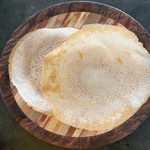

Beef Ularthu


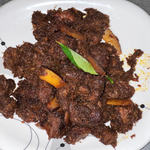

Family Combo- Appam+curry


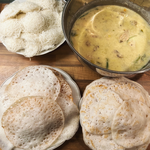

Chicken curry


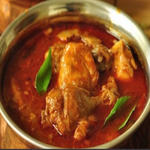

Gobi fry


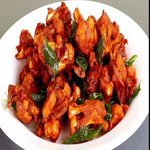

In [49]:
for i in range(1,6):     
    print(names[i])
    ima=url_to_image(pictures[i])
    display(ima)
    

In [53]:
for i in range(1,6):     
    print(names[i])

Paalappam
Beef Ularthu
Chicken curry
Vegetable cutlet
Gobi fry


In [ ]:
import pandas as pd

In [ ]:
idtem=pd.read_csv('user_item.csv')

In [ ]:
len(idtem['user_name'].unique())

In [ ]:
len(idtem['item_name'].unique())

In [ ]:
len(idtem['chef_name'].unique())

In [ ]:
idtem.shape

In [49]:
import pickle
#pickle.dump(n_df.to_dict(),open('item_dict.pkl','wb'))

In [ ]:
#pickle.dump(n_df.to_dict(),open('item_dict.pkl','wb'))
pickle.dump(item.to_dict(),open('dict_item.pkl','wb'))

In [ ]:
n_df.to_dict()

In [ ]:
pickle.dump(similarity,open('similarity.pkl','wb'))


In [50]:
pickle.dump(cosine_sim,open('cos_similarity.pkl','wb'))

In [ ]:
df[df['chef_name']=='Jinu Samuel']['item_name'].unique()

In [ ]:
pickle.dump(image.to_dict(),open('image.pkl','wb'))

In [ ]:
Falafel with Humus
# Acaraje family box
# ACARAJE
Fish fry

Moqueca with Fish, Rice and Pirão
Tiramisu
# Feijao Tropeiro

Vegan Cannoli
# Bobo de Camarao
Box of Premium Chocolate Glazed Cocoa Chips Brownie
Fajita Vegan with Syrian bread
Box of Premium Salted Caramel Cocoa Chips Brownie
